<a href="https://colab.research.google.com/github/tomtyiu/Fireball-series/blob/main/agent_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import getpass
import os

from google.colab import userdata


os.environ["HUGGINGFACEHUB_API_TOKEN"] = userdata.get('HIF_TOKN')

In [ ]:
!pip install --upgrade --quiet  langchain-huggingface text-generation transformers google-search-results numexpr langchainhub sentencepiece jinja2 bitsandbytes accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 88.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.9/399.9 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.1/292.1 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.7 MB/s eta 0:00:00


In [ ]:
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.5 MB/s eta 0:00:00


In [ ]:
from langchain_community.llms import HuggingFaceEndpoint
from langchain_community.chat_models.huggingface import ChatHuggingFace

from transformers import BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype="float16",
    bnb_4bit_use_double_quant=True,
)

In [ ]:
from huggingface_hub import login
login()

In [ ]:
from langchain_huggingface import ChatHuggingFace, HuggingFacePipeline

llm = HuggingFacePipeline.from_model_id(
    model_id="EpistemeAI/Fireball-Meta-Llama-3.1-8B-Instruct-Agent-0.003",
    task="text-generation",
    pipeline_kwargs=dict(
        max_new_tokens=512,
        do_sample=False,
        repetition_penalty=1.03,
        return_full_text=False,
    ),
    model_kwargs={"quantization_config": quantization_config},
)

chat_model = ChatHuggingFace(llm=llm)

tokenizer_config.json:   0%|          | 0.00/55.3k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

`low_cpu_mem_usage` was None, now set to True since model is quantized.


pytorch_model.bin.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

pytorch_model-00001-of-00004.bin:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

pytorch_model-00002-of-00004.bin:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

pytorch_model-00003-of-00004.bin:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

pytorch_model-00004-of-00004.bin:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

In [ ]:
from langchain_core.messages import (
    HumanMessage,
    SystemMessage,
)

messages = [
    SystemMessage(content=
    """
    Environment: ipython. Tools: brave_search, wolfram_alpha. Cutting Knowledge Date: December 2023. Today Date: 24 Auguest 2024\n
    You are a coding assistant with expert with everything\n
    Ensure any code you provide can be executed \n
    with all required imports and variables defined. List the imports.  Structure your answer with a description of the code solution. \n
    write only the code. do not print anything else.\n
    use ipython for search tool. \n
    debug code if erorr occurs. \n
    Here is the user question:"""
    ),
    HumanMessage(
        content="Create a plot showing the market caps of the top 7 publicly listed companies using data from Yahoo Finance in US. fix error no timezone found. Ensure FB is M"
    ),
]

ai_msg = chat_model.invoke(messages)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:601: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:606: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


In [ ]:
!pip install langchain_experimental

In [ ]:
from langchain_core.tools import Tool
from langchain_experimental.utilities import PythonREPL

In [ ]:
python_repl = PythonREPL()

In [ ]:
# You can create the tool to pass to an agent
repl_tool = Tool(
    name="python_repl",
    description="A Python shell. Use this to execute python commands. Input should be a valid python command. If you want to see the output of a value, you should print it out with `print(...)`.",
    func=python_repl.run,
)

In [ ]:
!pip install brave_search

In [ ]:
print(ai_msg.content)

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Get the stock data for the top 7 publicly listed companies in the US
tickers = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'FB', 'TSLA', 'BABA']
data = yf.download(tickers, start='2010-01-01', end='2022-12-31')['Adj Close']

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

# Plot the market caps of the top 7 publicly listed companies
plt.figure(figsize=(10,6))
plt.plot(df.index, df['AAPL'], label='AAPL')
plt.plot(df.index, df['GOOG'], label='GOOG')
plt.plot(df.index, df['MSFT'], label='MSFT')
plt.plot(df.index, df['AMZN'], label='AMZN')
plt.plot(df.index, df['FB'], label='FB')
plt.plot(df.index, df['TSLA'], label='TSLA')
plt.plot(df.index, df['BABA'], label='BABA')
plt.xlabel('Date')
plt.ylabel('Market Cap')
plt.title('Market Caps of Top 7 Publicly Listed Companies in the US')
plt.legend()
plt.show()


[*********************100%***********************]  7 of 7 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


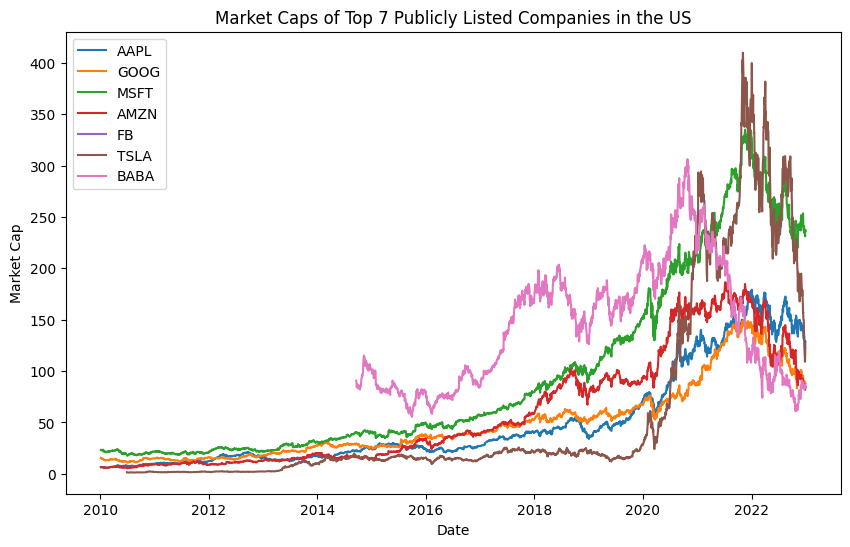

''

In [ ]:
repl_tool(ai_msg.content)